<a href="https://colab.research.google.com/github/N00B-MA5TER/ML-Projects/blob/main/Loan_Eligibility_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the dependencies**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

**Data Collection and Processing**

In [2]:
# loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv')

In [3]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [4]:
#printing the first five columns of the DataFrame
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
#number of rows and columns
loan_dataset.shape

(614, 13)

In [6]:
# statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [40]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    int64  
 2   Married            480 non-null    int64  
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    int64  
 5   Self_Employed      480 non-null    int64  
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    int64  
 12  Loan_Status        480 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 68.7+ KB


In [7]:
# number of missing values in each column
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [8]:
# dropping the missing values
loan_dataset = loan_dataset.dropna()

In [9]:
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [10]:
# label encoding
loan_dataset.replace({"Loan_Status" : {'N' : 0, 'Y' : 1}}, inplace=True)

/tmp/ipython-input-617741777.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({"Loan_Status" : {'N' : 0, 'Y' : 1}}, inplace=True)


In [11]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [12]:
#Dependent column values
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
3+,41


In [13]:
# replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace = "3+", value = 4)

In [14]:
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
4,41


**Data Visualization**

<Axes: xlabel='Education', ylabel='count'>

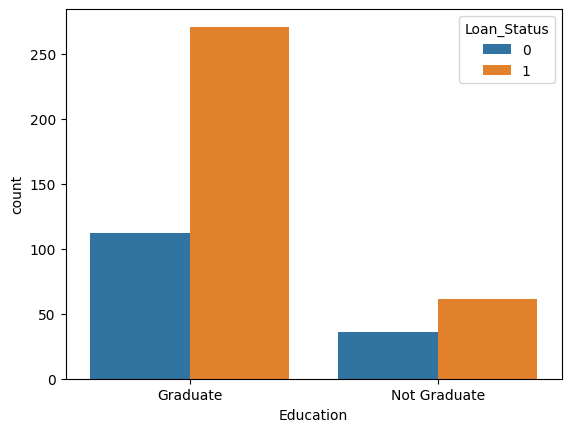

In [15]:
#education and loan status
sns.countplot(x = "Education", hue = "Loan_Status", data = loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

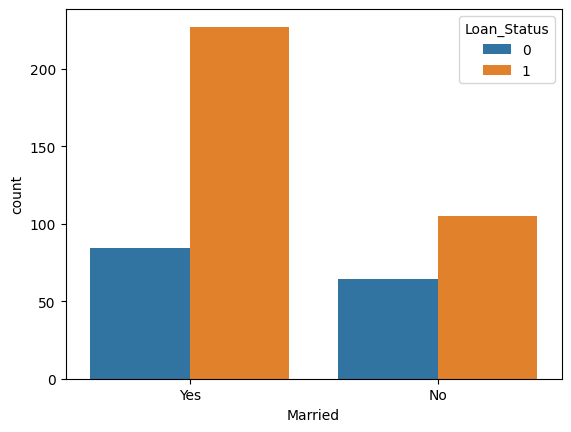

In [16]:
# marital status and loan status
sns.countplot(x = "Married", hue = "Loan_Status", data = loan_dataset)

In [17]:
# convert categorical columns to numerical values
loan_dataset.replace({"Married" : {"No" : 0, "Yes" : 1},
                      "Gender" : {"Male" : 1, "Female" : 0},
                      "Self_Employed" : {"No" : 0, "Yes" : 1},
                      "Property_Area" : {"Rural" : 0, "Semiurban" : 1, "Urban" : 2},
                      "Education" : {"Graduate" : 1, "Not Graduate" : 0}}, inplace = True)

/tmp/ipython-input-197014271.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({"Married" : {"No" : 0, "Yes" : 1},


In [18]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [19]:
# separating data and label
X = loan_dataset.drop(columns = ["Loan_ID", "Loan_Status"], axis = 1)
Y = loan_dataset["Loan_Status"]

In [20]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

**Train Test Split**

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify = Y, random_state = 2)

In [22]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


**Training the model : Support Vector Machine Model**

In [23]:
classifier = svm.SVC(kernel = "linear")

In [24]:
#training the support vector machine model
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

**Model Evaluation**

In [25]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [26]:
print("Accuracy on training data : ", training_data_accuracy)

Accuracy on training data :  0.7986111111111112


In [27]:
# accuracy score on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [28]:
print("Accuracy on test data : ", test_data_accuracy)

Accuracy on test data :  0.8333333333333334


**Making a predictive system**

In [29]:
X_prediction_data = X_train.head(1)
prediction = classifier.predict(X_prediction_data)
print(prediction)

if (prediction[0] == 0):
  print("The loan is not approved")
else:
  print("The loan is approved")

[0]
The loan is not approved


**Trying Logistic Regression Model**

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, Y_train)

# Make predictions on the training data
X_train_prediction_lr = model.predict(X_train)
training_data_accuracy_lr = accuracy_score(X_train_prediction_lr, Y_train)

# Make predictions on the test data
X_test_prediction_lr = model.predict(X_test)
test_data_accuracy_lr = accuracy_score(X_test_prediction_lr, Y_test)

print("Accuracy on training data (Logistic Regression):", training_data_accuracy_lr)
print("Accuracy on test data (Logistic Regression):", test_data_accuracy_lr)

Accuracy on training data (Logistic Regression): 0.8009259259259259
Accuracy on test data (Logistic Regression): 0.8333333333333334


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Scaling the data for Logistic Regression**

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# Initialize the Logistic Regression model
model_scaled = LogisticRegression()

# Train the model with scaled data
model_scaled.fit(X_train_scaled, Y_train)

# Make predictions on the training data
X_train_prediction_lr_scaled = model_scaled.predict(X_train_scaled)
training_data_accuracy_lr_scaled = accuracy_score(X_train_prediction_lr_scaled, Y_train)

# Make predictions on the test data
X_test_prediction_lr_scaled = model_scaled.predict(X_test_scaled)
test_data_accuracy_lr_scaled = accuracy_score(X_test_prediction_lr_scaled, Y_test)

print("Accuracy on training data (Logistic Regression with scaling):", training_data_accuracy_lr_scaled)
print("Accuracy on test data (Logistic Regression with scaling):", test_data_accuracy_lr_scaled)

Accuracy on training data (Logistic Regression with scaling): 0.8055555555555556
Accuracy on test data (Logistic Regression with scaling): 0.8333333333333334


**Trying Decision Tree Model**

In [33]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=2)

# Train the model with scaled data
dt_model.fit(X_train_scaled, Y_train)

# Make predictions on the training data
X_train_prediction_dt = dt_model.predict(X_train_scaled)
training_data_accuracy_dt = accuracy_score(X_train_prediction_dt, Y_train)

# Make predictions on the test data
X_test_prediction_dt = dt_model.predict(X_test_scaled)
test_data_accuracy_dt = accuracy_score(X_test_prediction_dt, Y_test)

print("Accuracy on training data (Decision Tree):", training_data_accuracy_dt)
print("Accuracy on test data (Decision Tree):", test_data_accuracy_dt)

Accuracy on training data (Decision Tree): 1.0
Accuracy on test data (Decision Tree): 0.75


**Trying Random Forest Model**

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=2)

# Train the model with scaled data
rf_model.fit(X_train_scaled, Y_train)

# Make predictions on the training data
X_train_prediction_rf = rf_model.predict(X_train_scaled)
training_data_accuracy_rf = accuracy_score(X_train_prediction_rf, Y_train)

# Make predictions on the test data
X_test_prediction_rf = rf_model.predict(X_test_scaled)
test_data_accuracy_rf = accuracy_score(X_test_prediction_rf, Y_test)

print("Accuracy on training data (Random Forest):", training_data_accuracy_rf)
print("Accuracy on test data (Random Forest):", test_data_accuracy_rf)

Accuracy on training data (Random Forest): 1.0
Accuracy on test data (Random Forest): 0.8125


**Trying XGBoost Model**

In [36]:
!pip install xgboost

In [37]:
from xgboost import XGBClassifier

# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=2)

# Train the model with scaled data
xgb_model.fit(X_train_scaled, Y_train)

# Make predictions on the training data
X_train_prediction_xgb = xgb_model.predict(X_train_scaled)
training_data_accuracy_xgb = accuracy_score(X_train_prediction_xgb, Y_train)

# Make predictions on the test data
X_test_prediction_xgb = xgb_model.predict(X_test_scaled)
test_data_accuracy_xgb = accuracy_score(X_test_prediction_xgb, Y_test)

print("Accuracy on training data (XGBoost):", training_data_accuracy_xgb)
print("Accuracy on test data (XGBoost):", test_data_accuracy_xgb)

Accuracy on training data (XGBoost): 1.0
Accuracy on test data (XGBoost): 0.8125


**Comparing Model Performance**

In [38]:
print("SVM Model Accuracy:")
print("Training:", training_data_accuracy)
print("Test:", test_data_accuracy)
print("\nLogistic Regression Model Accuracy (with scaling):")
print("Training:", training_data_accuracy_lr_scaled)
print("Test:", test_data_accuracy_lr_scaled)
print("\nDecision Tree Model Accuracy:")
print("Training:", training_data_accuracy_dt)
print("Test:", test_data_accuracy_dt)
print("\nRandom Forest Model Accuracy:")
print("Training:", training_data_accuracy_rf)
print("Test:", test_data_accuracy_rf)
print("\nXGBoost Model Accuracy:")
print("Training:", training_data_accuracy_xgb)
print("Test:", test_data_accuracy_xgb)

SVM Model Accuracy:
Training: 0.7986111111111112
Test: 0.8333333333333334

Logistic Regression Model Accuracy (with scaling):
Training: 0.8055555555555556
Test: 0.8333333333333334

Decision Tree Model Accuracy:
Training: 1.0
Test: 0.75

Random Forest Model Accuracy:
Training: 1.0
Test: 0.8125

XGBoost Model Accuracy:
Training: 1.0
Test: 0.8125


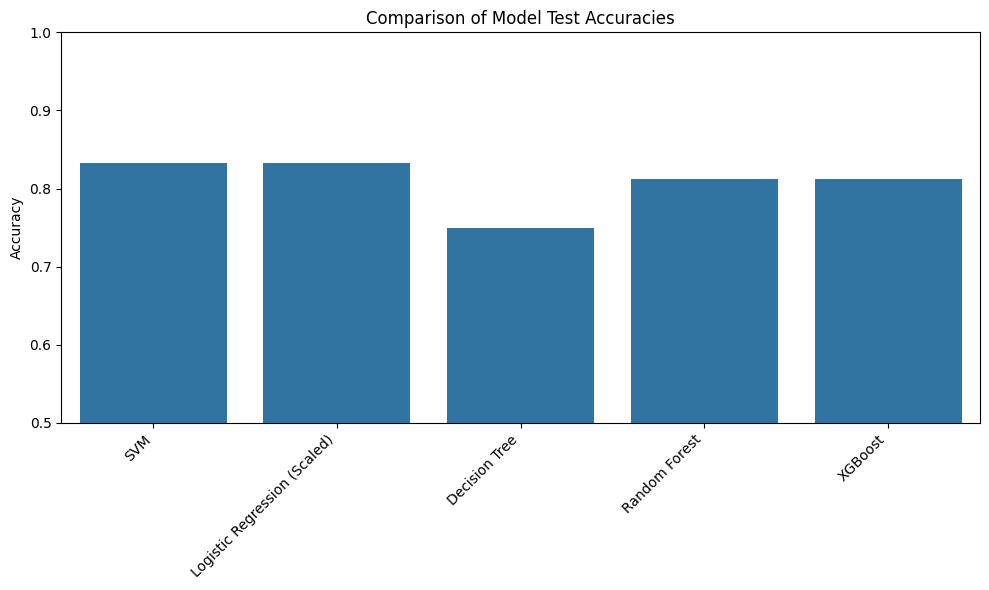

In [39]:
import matplotlib.pyplot as plt

models = ['SVM', 'Logistic Regression (Scaled)', 'Decision Tree', 'Random Forest', 'XGBoost']
test_accuracies = [test_data_accuracy, test_data_accuracy_lr_scaled, test_data_accuracy_dt, test_data_accuracy_rf, test_data_accuracy_xgb]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=test_accuracies)
plt.ylabel('Accuracy')
plt.title('Comparison of Model Test Accuracies')
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Task
Compare the accuracy of different models (SVM, Logistic Regression, Decision Tree, Random Forest, XGBoost) using k-fold cross-validation instead of train-test split.

## Implement k-fold cross-validation

### Subtask:
For each model (SVM, Logistic Regression, Decision Tree, Random Forest, XGBoost), use scikit-learn's `cross_val_score` to perform k-fold cross-validation and calculate the mean accuracy.


**Reasoning**:
The subtask requires comparing model performance using cross-validation. This involves importing the `cross_val_score` function, defining the number of folds, and then iterating through each model, performing cross-validation on the appropriate data (scaled for Logistic Regression, unscaled for others), calculating the mean accuracy, and printing the results. I will perform these steps in a single code block for efficiency.



In [43]:
# Convert 'Dependents' column to numeric
X['Dependents'] = pd.to_numeric(X['Dependents'])

# Scale the entire feature set for Logistic Regression after converting 'Dependents'
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# SVM Model
svm_model_cv = SVC(kernel = "linear", random_state=2)
svm_cv_scores = cross_val_score(svm_model_cv, X, Y, cv=cv_folds, scoring='accuracy')
print(f"Mean Cross-Validation Accuracy (SVM): {svm_cv_scores.mean():.4f}")

# Logistic Regression Model with scaling
lr_model_cv = LogisticRegression(random_state=2)
lr_cv_scores = cross_val_score(lr_model_cv, X_scaled, Y, cv=cv_folds, scoring='accuracy')
print(f"Mean Cross-Validation Accuracy (Logistic Regression): {lr_cv_scores.mean():.4f}")

# Decision Tree Model
dt_model_cv = DecisionTreeClassifier(random_state=2)
dt_cv_scores = cross_val_score(dt_model_cv, X, Y, cv=cv_folds, scoring='accuracy')
print(f"Mean Cross-Validation Accuracy (Decision Tree): {dt_cv_scores.mean():.4f}")

# Random Forest Model
rf_model_cv = RandomForestClassifier(random_state=2)
rf_cv_scores = cross_val_score(rf_model_cv, X, Y, cv=cv_folds, scoring='accuracy')
print(f"Mean Cross-Validation Accuracy (Random Forest): {rf_cv_scores.mean():.4f}")

# XGBoost Model
xgb_model_cv = XGBClassifier(random_state=2)
xgb_cv_scores = cross_val_score(xgb_model_cv, X, Y, cv=cv_folds, scoring='accuracy')
print(f"Mean Cross-Validation Accuracy (XGBoost): {xgb_cv_scores.mean():.4f}")

Mean Cross-Validation Accuracy (SVM): 0.7750
Mean Cross-Validation Accuracy (Logistic Regression): 0.8021
Mean Cross-Validation Accuracy (Decision Tree): 0.7125
Mean Cross-Validation Accuracy (Random Forest): 0.8042
Mean Cross-Validation Accuracy (XGBoost): 0.7812


## Store cross-validation results

### Subtask:
Store the mean accuracy scores for each model.


In [44]:
# Store mean accuracies in a dictionary
mean_accuracies = {
    'SVM': svm_cv_scores.mean(),
    'Logistic Regression (Scaled)': lr_cv_scores.mean(),
    'Decision Tree': dt_cv_scores.mean(),
    'Random Forest': rf_cv_scores.mean(),
    'XGBoost': xgb_cv_scores.mean()
}

print("\nMean Cross-Validation Accuracies:")
print(mean_accuracies)


Mean Cross-Validation Accuracies:
{'SVM': np.float64(0.7749999999999999), 'Logistic Regression (Scaled)': np.float64(0.8020833333333334), 'Decision Tree': np.float64(0.7125000000000001), 'Random Forest': np.float64(0.8041666666666666), 'XGBoost': np.float64(0.78125)}


## Compare cross-validation accuracies

### Subtask:
Display or visualize the cross-validation accuracy scores to compare the models' performance.


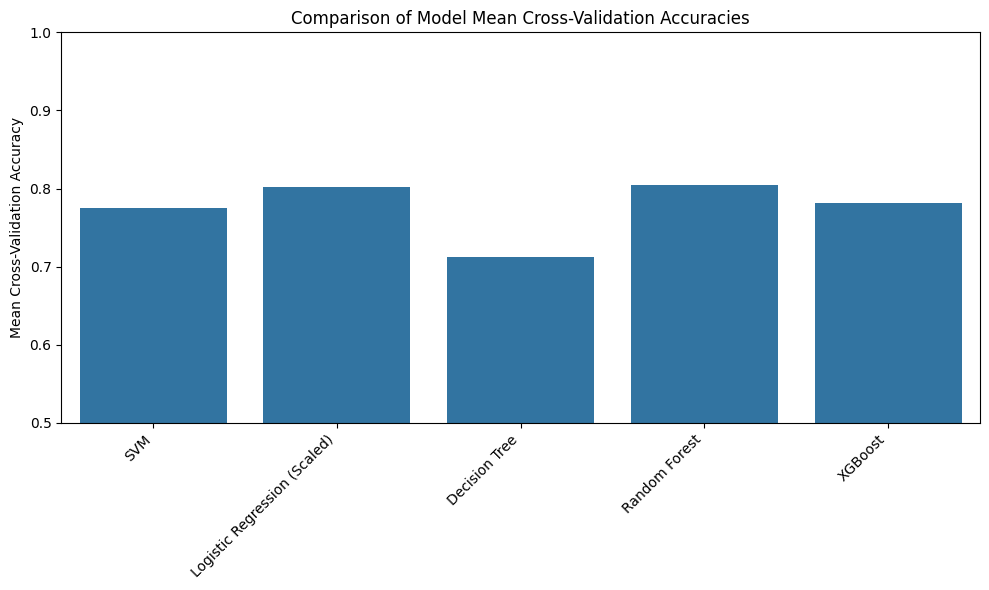

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

models = list(mean_accuracies.keys())
mean_scores = list(mean_accuracies.values())

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=mean_scores)
plt.ylabel('Mean Cross-Validation Accuracy')
plt.title('Comparison of Model Mean Cross-Validation Accuracies')
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The mean cross-validation accuracy for SVM is 0.7750.
*   The mean cross-validation accuracy for Logistic Regression (Scaled) is 0.8021.
*   The mean cross-validation accuracy for Decision Tree is 0.7125.
*   The mean cross-validation accuracy for Random Forest is 0.8042.
*   The mean cross-validation accuracy for XGBoost is 0.7813.
*   Random Forest achieved the highest mean cross-validation accuracy (0.8042) among the compared models.
*   Decision Tree had the lowest mean cross-validation accuracy (0.7125).

### Insights or Next Steps

*   Consider tuning the hyperparameters of the Random Forest and Logistic Regression models to potentially further improve their accuracy.
*   Investigate why the Decision Tree model performed significantly worse than the other models and consider alternative tree-based models or feature engineering.
